In [1]:
import drawSvg as draw

In [13]:
def parse_svg_path(path_string, draw_commands="MmZzLlHhVvCcSsQqTtAa"):
    
    def parse_helper(path_data):
        # Adapted from codereview.stackexchange.com/questions/28502/svg-path-parsing/
        digits = '0123456789eE'; whitespace = ', \t\n\r\f\v'; sign = '+-'; exponent = 'eE'
        flt = False; entity = ''
        for char in path_data:
            if char in digits:
                entity += char
            elif char in whitespace and entity:
                yield entity
                flt = False; entity = ''
            elif char in draw_commands:
                if entity:
                    yield entity
                    flt = False; entity = ''
                yield "~" + char
            elif char == '.':
                if flt:
                    yield entity
                    entity = '.'
                else:
                    flt = True; entity += '.'
            elif char in sign:
                if entity and entity[-1] not in exponent:
                    yield entity
                    flt = False; entity = char
                else:
                    entity += char
        if entity:
            yield entity
    
    codes = {draw_commands[i]: i for i in range(len(draw_commands))}
    def to_float(x):
        try:
            return float(x)
        except:
            return float(codes[x])
    
    as_str = ','.join([i for i in parse_helper(svg)]).split("~")[1:]
    as_list = [[to_float(x) for x in s.split(",")[:-1]] if len(s) > 1 else [to_float(s)] for s in as_str]

    return as_list

In [33]:
def draw_svg_path(path_list, size=(2000,2000), origin=(0,0), stroke_width=30, stroke="black", fill_opacity=0.1, scale=0.1,
                  draw_commands="MmZzLlHhVvCcSsQqTtAa"):
    drawing = draw.Drawing(*size, origin)
    path = draw.Path(stroke_width=stroke_width, stroke=stroke, fill_opacity=fill_opacity)

    reverse_codes = {i : draw_commands[i] for i in range(len(draw_commands))}
    
    for i, cmd in enumerate(path_list):
        if reverse_codes[cmd[0]] == 'z':
            f = path.Z
        else:
            f = getattr(path, reverse_codes[cmd[0]])
        f(*cmd[1:])
    drawing.append(path)
    drawing.setPixelScale(scale)
    return drawing

In [34]:
svg = "M169 0v1456h476q237 0 356.5 -98t119.5 -290q0 -102 -58 -180.5t-158 -121.5q118 -33 186.5 -125.5t68.5 -220.5q0 -196 -127 -308t-359 -112h-505zM361 681v-524h317q134 0 211.5 69.5t77.5 191.5q0 263 -286 263h-320zM361 835h290q126 0 201.5 63t75.5 171q0 120 -70 174.5t-213 54.5h-284v-463z"

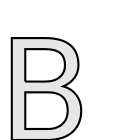

In [35]:
draw_svg_path(parse_svg_path(svg), size=(2000,2000), origin=(0,0), scale=0.07)